# UMAP Demonstration

Comparing UMAP with t-SNE and PCA on high-dimensional data.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import time

sns.set_style('white')
plt.rcParams['figure.figsize'] = (14, 6)
np.random.seed(42)

---
## Load Data

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f'Data shape: {X.shape}')
print(f'Dimensions: {X.shape[1]}')
print(f'Samples: {X.shape[0]}')

Data shape: (1797, 64)
Dimensions: 64
Samples: 1797


---
## Compare: PCA vs t-SNE vs UMAP

In [3]:
# PCA
start = time.time()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_time = time.time() - start

# t-SNE
start = time.time()
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
tsne_time = time.time() - start

# UMAP
start = time.time()
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)
umap_time = time.time() - start

print(f'PCA time: {pca_time:.2f}s')
print(f't-SNE time: {tsne_time:.2f}s')
print(f'UMAP time: {umap_time:.2f}s')
print(f'\nUMAP speedup vs t-SNE: {tsne_time/umap_time:.1f}x')

C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


PCA time: 0.00s
t-SNE time: 7.47s
UMAP time: 13.56s

UMAP speedup vs t-SNE: 0.6x


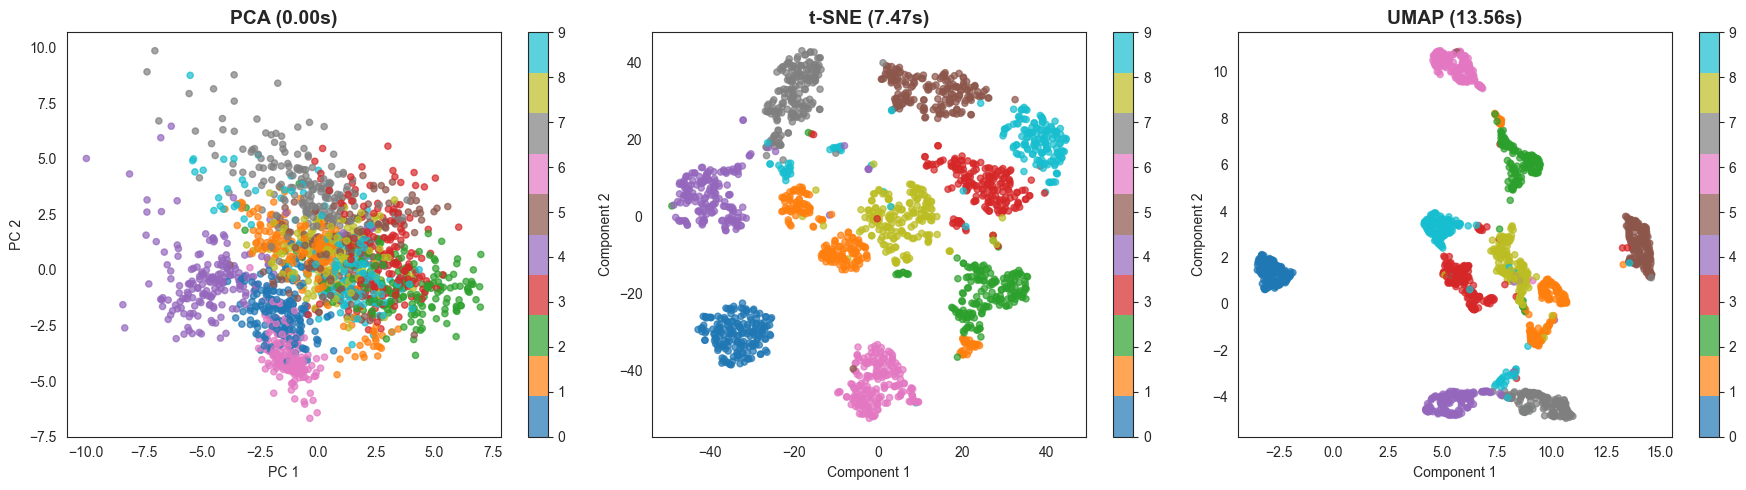

UMAP: Faster than t-SNE, preserves structure better than PCA


In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=20, alpha=0.7)
axes[0].set_title(f'PCA ({pca_time:.2f}s)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('PC 1')
axes[0].set_ylabel('PC 2')
plt.colorbar(scatter1, ax=axes[0])

# t-SNE
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=20, alpha=0.7)
axes[1].set_title(f't-SNE ({tsne_time:.2f}s)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')
plt.colorbar(scatter2, ax=axes[1])

# UMAP
scatter3 = axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=20, alpha=0.7)
axes[2].set_title(f'UMAP ({umap_time:.2f}s)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Component 1')
axes[2].set_ylabel('Component 2')
plt.colorbar(scatter3, ax=axes[2])

plt.tight_layout()
plt.show()

print('UMAP: Faster than t-SNE, preserves structure better than PCA')

---
## Effect of n_neighbors

C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


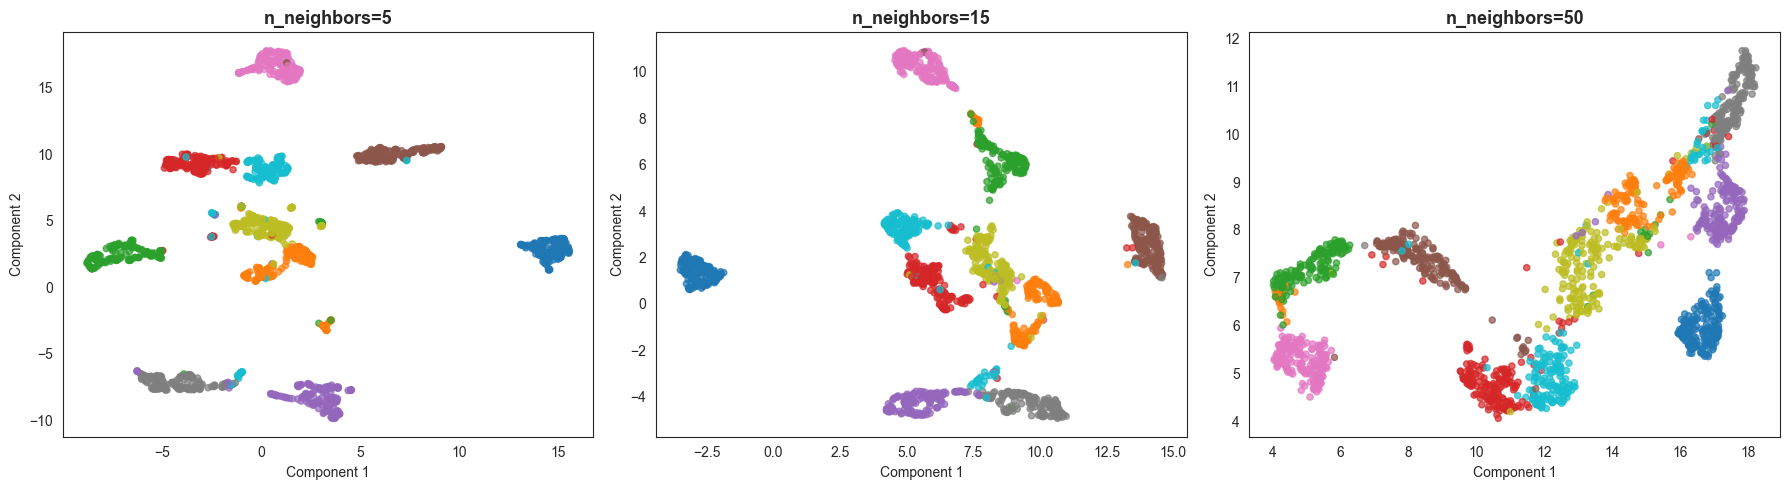

Small n_neighbors: Local structure, fine detail
Large n_neighbors: Global structure, broader view


In [5]:
n_neighbors_values = [5, 15, 50]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, n_neighbors in enumerate(n_neighbors_values):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.1, random_state=42)
    X_temp = reducer.fit_transform(X_scaled)
    
    scatter = axes[idx].scatter(X_temp[:, 0], X_temp[:, 1], c=y, cmap='tab10', s=20, alpha=0.7)
    axes[idx].set_title(f'n_neighbors={n_neighbors}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Component 1')
    axes[idx].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

print('Small n_neighbors: Local structure, fine detail')
print('Large n_neighbors: Global structure, broader view')

---
## Effect of min_dist

C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


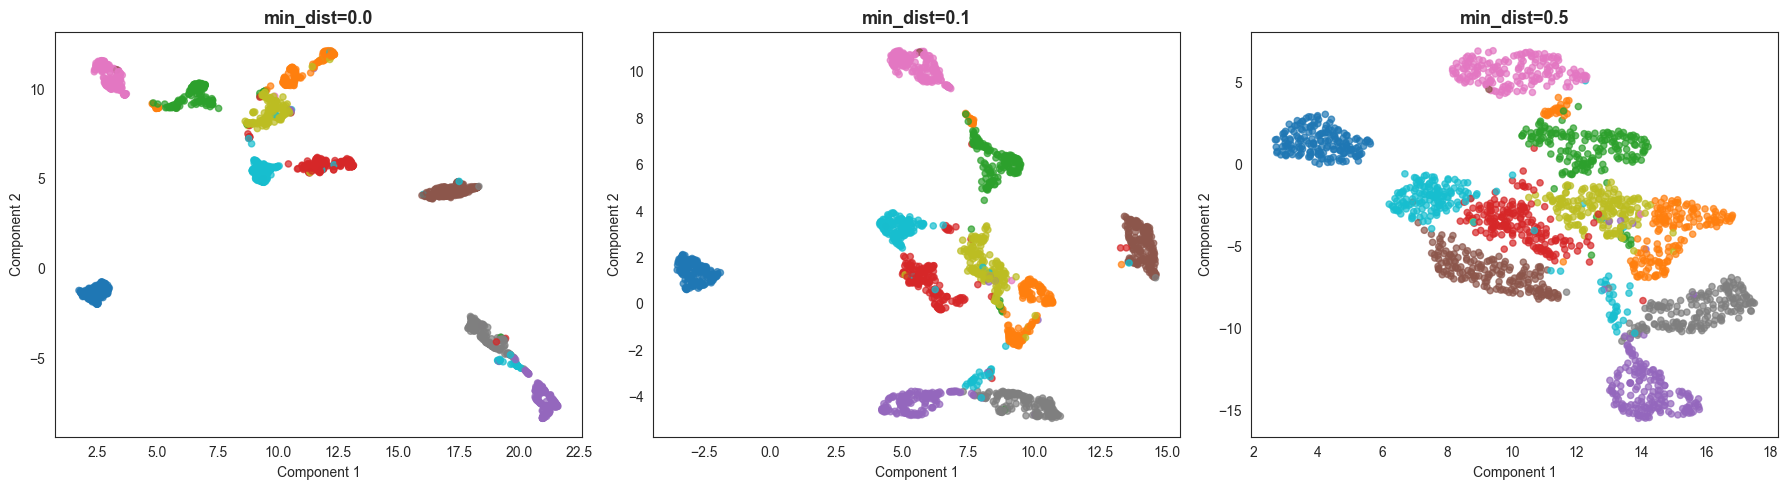

min_dist=0.0: Tight clusters
min_dist=0.5: Spread out


In [6]:
min_dist_values = [0.0, 0.1, 0.5]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, min_dist in enumerate(min_dist_values):
    reducer = umap.UMAP(n_neighbors=15, min_dist=min_dist, random_state=42)
    X_temp = reducer.fit_transform(X_scaled)
    
    scatter = axes[idx].scatter(X_temp[:, 0], X_temp[:, 1], c=y, cmap='tab10', s=20, alpha=0.7)
    axes[idx].set_title(f'min_dist={min_dist}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Component 1')
    axes[idx].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

print('min_dist=0.0: Tight clusters')
print('min_dist=0.5: Spread out')

---
## Transform New Data

C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


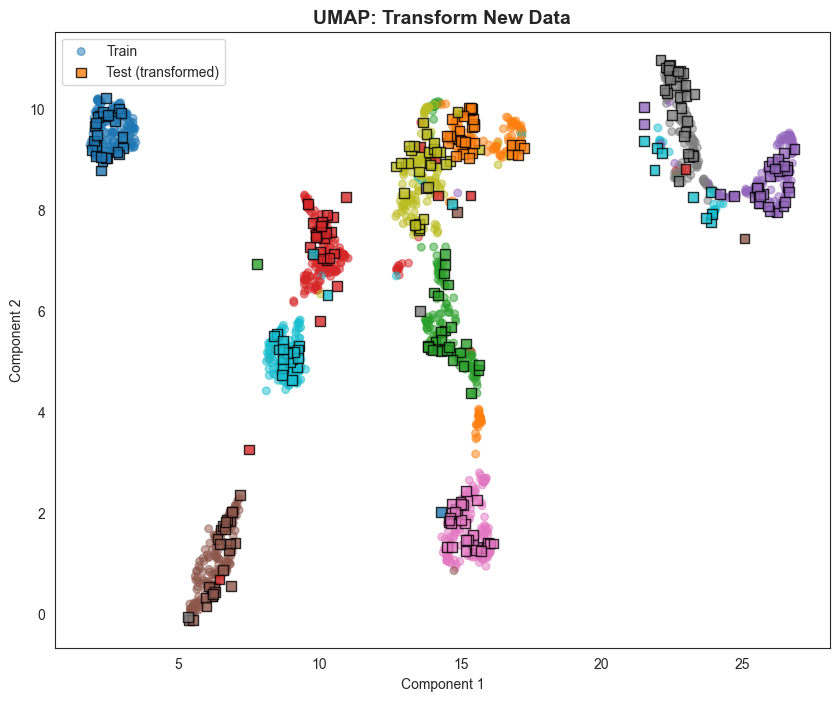

UMAP can transform new data (unlike t-SNE)
Useful for: production pipelines, online learning


In [7]:
# Split data
X_train = X_scaled[:1500]
X_test = X_scaled[1500:]
y_train = y[:1500]
y_test = y[1500:]

# Fit on training data
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_train_umap = reducer.fit_transform(X_train)

# Transform test data (UMAP can do this, t-SNE cannot!)
X_test_umap = reducer.transform(X_test)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, 
           cmap='tab10', s=30, alpha=0.5, label='Train')
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_test,
           cmap='tab10', s=50, alpha=0.8, marker='s', 
           edgecolors='black', linewidth=1, label='Test (transformed)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('UMAP: Transform New Data', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

print('UMAP can transform new data (unlike t-SNE)')
print('Useful for: production pipelines, online learning')

---
## Summary

**Key Points:**
- UMAP is faster than t-SNE with similar quality
- Preserves both local and global structure
- Can transform new data points
- n_neighbors controls local/global tradeoff
- min_dist controls cluster tightness

**Key Point:** "UMAP provides fast, scalable dimensionality reduction preserving both local and global structure. Significantly faster than t-SNE while maintaining visualization quality. Can transform new data for production use."